### Exploratory Analysis of Genetech's Floodlight data

App is downloadable for the iPhone:
https://itunes.apple.com/us/app/floodlight-open/id1365939494?ls=1&mt=8

Limited to specific stores.

Questionable: Do you already a bias by limiting the study to a specific platform? Probaly lower bias as the technological bias in general. The median age is 44 (number with data from 12.09.2018). Average diagnosis age is around 30.
Also, much more women are affected.

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('ggplot')

sns.set(color_codes=True)

# Set ipython's max row display
pd.set_option('display.max_row', 1000)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)

%matplotlib inline

In [2]:
# Import the data, downloaded from here: https://dataset.floodlightopen.com/public-blobs-prod/complete_dataset.csv
raw_df = pd.read_csv("C:\\Users\\MKO\\Downloads\\complete_dataset.csv")

In [79]:
# First glimpse
raw_df.head()

,floodlightOpenId,participantCreatedOn,participantDemographicId,participantIsControl,participantCountryOfResidence,participantSex,participantBirthYear,participantWeightLbs,participantHeightCms,testName,testMetricName,testResultMetricId,testResultMetricCreatedOn,testResultMetricTimestamp1,testResultMetricTimestamp2,testResultMetricValue,Unnamed: 16
0,FL10038084,4/23/2018 12:12:03 AM +00:00,66,True,US,male,1966,159.0,178.0,Daily Questions,Mood Response,115524,4/23/2018 12:22:57 AM +00:00,NaN,NaN,4.00,NaN
1,FL10038084,4/23/2018 12:12:03 AM +00:00,66,True,US,male,1966,159.0,178.0,Daily Questions,Mood Response,116040,4/25/2018 4:04:32 AM +00:00,NaN,NaN,5.00,NaN
2,FL10038084,4/23/2018 12:12:03 AM +00:00,66,True,US,male,1966,159.0,178.0,Information Processing Speed Baseline Test,Correct Responses,116041,4/25/2018 4:06:51 AM +00:00,NaN,NaN,16.00,NaN
3,FL10038084,4/23/2018 12:12:03 AM +00:00,66,True,US,male,1966,159.0,178.0,Information Processing Speed Baseline Test,Response Time Average,116042,4/25/2018 4:06:51 AM +00:00,NaN,NaN,0.94,NaN
4,FL10038084,4/23/2018 12:12:03 AM +00:00,66,True,US,male,1966,159.0,178.0,IPS,Correct Responses,116043,4/25/2018 4:06:51 AM +00:00,NaN,NaN,39.00,NaN


In [8]:
# Latest entries are at the end
raw_df.tail()

,floodlightOpenId,participantCreatedOn,participantDemographicId,participantIsControl,participantCountryOfResidence,participantSex,participantBirthYear,participantWeightLbs,participantHeightCms,testName,testMetricName,testResultMetricId,testResultMetricCreatedOn,testResultMetricTimestamp1,testResultMetricTimestamp2,testResultMetricValue,Unnamed: 16
9995,FL75533705,9/11/2018 10:00:07 PM +00:00,289,False,CA,female,1985,175.0,171.0,Draw A Shape,Hand Used,126125,9/11/2018 10:11:10 PM +00:00,NaN,NaN,1.00,NaN
9996,FL75533705,9/11/2018 10:00:07 PM +00:00,289,False,CA,female,1985,175.0,171.0,Static Balance,Sway Path,126126,9/11/2018 10:12:35 PM +00:00,NaN,NaN,8.07,NaN
9997,FL75533705,9/11/2018 10:00:07 PM +00:00,289,False,CA,female,1985,175.0,171.0,Five UTurn Test,Turns,126127,9/11/2018 10:14:17 PM +00:00,NaN,NaN,9.00,NaN
9998,FL75533705,9/11/2018 10:00:07 PM +00:00,289,False,CA,female,1985,175.0,171.0,Five UTurn Test,Turn Speed Average,126128,9/11/2018 10:14:17 PM +00:00,NaN,NaN,1.11,NaN
9999,FL75533705,9/11/2018 10:00:07 PM +00:00,289,False,CA,female,1985,175.0,171.0,Mobility,Life Space Daily,126129,9/11/2018 11:41:00 PM +00:00,NaN,NaN,0.00,NaN


In [9]:
# Total matrix size, seens that this file grew since last run :-)
raw_df.shape

# Exactly 10,000 ?? Looks like someone is 'curating' this data, but really recent data.

(10000, 17)

In [47]:
# Doesn't make much sense, but for height and weight, Median of Birth Year is 1974
raw_df.describe()

,participantDemographicId,participantBirthYear,participantWeightLbs,participantHeightCms,testResultMetricId,testResultMetricValue,Unnamed: 16
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,0.0
mean,160.416400,1976.868300,183.874900,161.211000,121107.042000,35.915352,NaN
std,60.428117,10.704663,64.936883,39.739283,2916.959754,334.106781,NaN
min,66.000000,1950.000000,112.000000,6.000000,115524.000000,0.000000,NaN
25%,110.000000,1970.000000,136.000000,160.000000,118609.750000,0.140000,NaN
50%,148.000000,1974.000000,168.000000,168.000000,121129.500000,1.000000,NaN
75%,224.000000,1985.000000,190.000000,178.000000,123629.250000,7.207500,NaN
max,289.000000,2017.000000,486.000000,300.000000,126129.000000,9607.600000,NaN


In [42]:
# How many participants do we have in total?
print("Unique app users: " + str(len(raw_df.floodlightOpenId.unique())))

Unique app users: 188


In [43]:
# Where are they from?
unique_locations = raw_df.participantDemographicId.unique()
print("Unique Demographic ID: " + str(len(unique_locations)))

# What? All are from a different location? 
# Not clear what kind of location this participantDemographicId is encoding. City? State?

Unique Demographic ID: 188


In [45]:

# What does this mean? Half of the participants are healthy?
raw_df.groupby('participantIsControl')['participantIsControl'].count()

participantIsControl
False    4314
True     5686
Name: participantIsControl, dtype: int64

In [48]:
raw_df.groupby('participantCountryOfResidence')['participantCountryOfResidence'].count()

participantCountryOfResidence
CA     136
GB      16
US    9848
Name: participantCountryOfResidence, dtype: int64

In [49]:
raw_df.groupby('participantSex')['participantSex'].count()

participantSex
female    5863
male      4137
Name: participantSex, dtype: int64

In [50]:
# Let's have a look at the age distribution
raw_df.participantBirthYear.unique()

array([1966, 1964, 1963, 1997, 1972, 1990, 1974, 1971, 1982, 1978, 1969,
       1977, 1985, 1965, 1979, 1986, 1983, 1987, 1975, 1976, 1970, 1980,
       1984, 1968, 1973, 1991, 1967, 1954, 1981, 1950, 1993, 1961, 1988,
       1962, 1960, 1959, 1995, 2016, 1998, 1956, 1989, 1957, 1958, 1992,
       1953, 2017], dtype=int64)

In [51]:
# aggregate participants per birth year
birthYear = raw_df.groupby('participantBirthYear')['floodlightOpenId'].nunique()

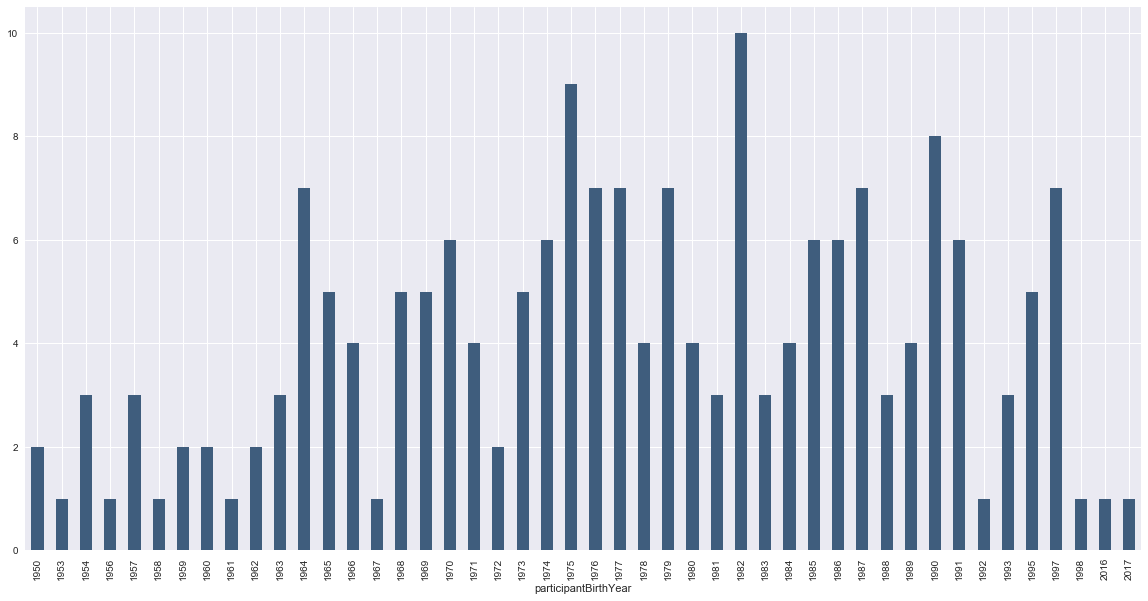

In [84]:
# have a visual view, value 2016 is a 'mistake' I guess
birthYear.plot(kind="bar", figsize= (20,10), color="#3F5D7D")

In [60]:
# The first 10 columns do not change, over time. This is basically master data and is redundant information.
# As this is eventually put into MongoDB, it might be Ok in this format.

masterdata_df = raw_df.iloc[:,0:9]

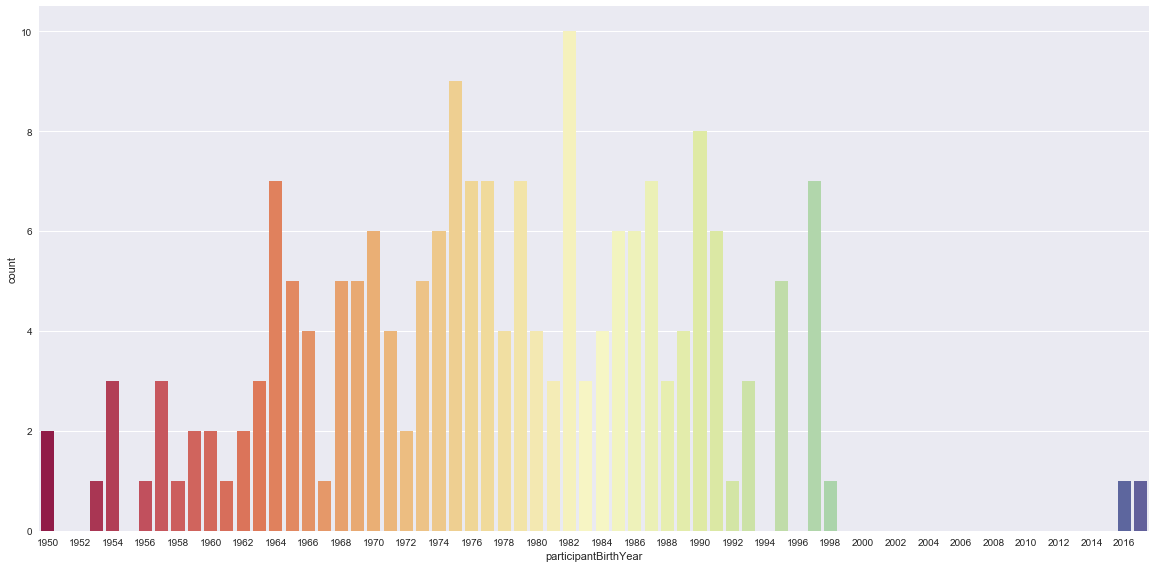

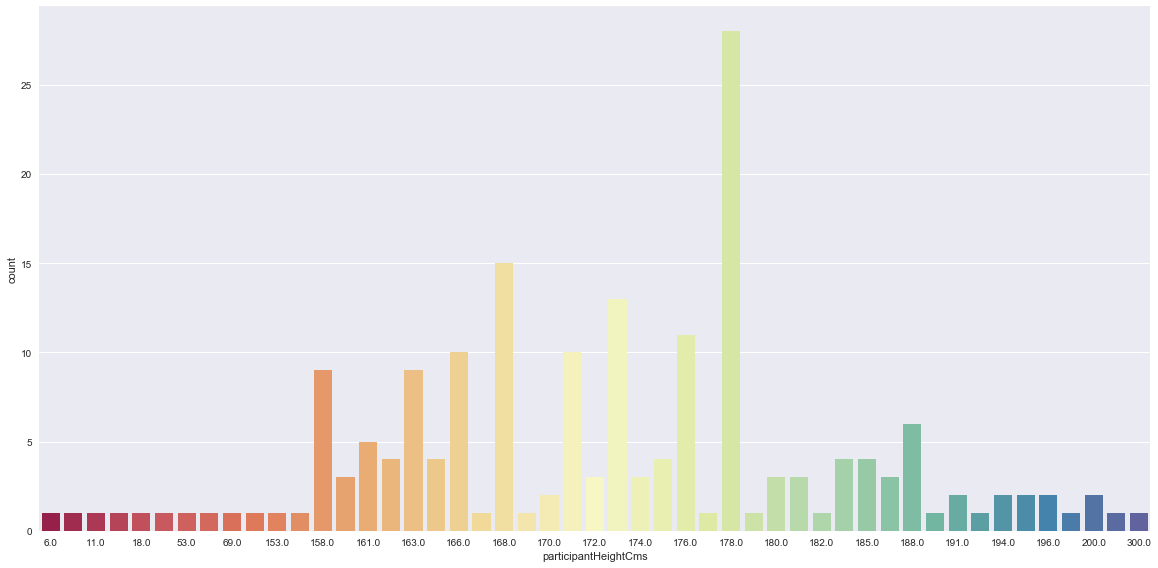

In [61]:
# Same as above with matplotlib, now seaborn

unique_individuals = masterdata_df.drop_duplicates()

# birth year distribution
years = np.arange(1950, 2018)
g = sns.factorplot(x="participantBirthYear", data=unique_individuals, kind="count",
                   palette="Spectral", size=8, aspect=2, order=years)
g.set_xticklabels(step=2)


# have a look at the height
g = sns.factorplot(x="participantHeightCms", data=unique_individuals, kind="count",
                   palette="Spectral", size=8, aspect=2)
g.set_xticklabels(step=2)

# Why are so many 178 cm? Is this the default value in the app? Should be more bell shaped

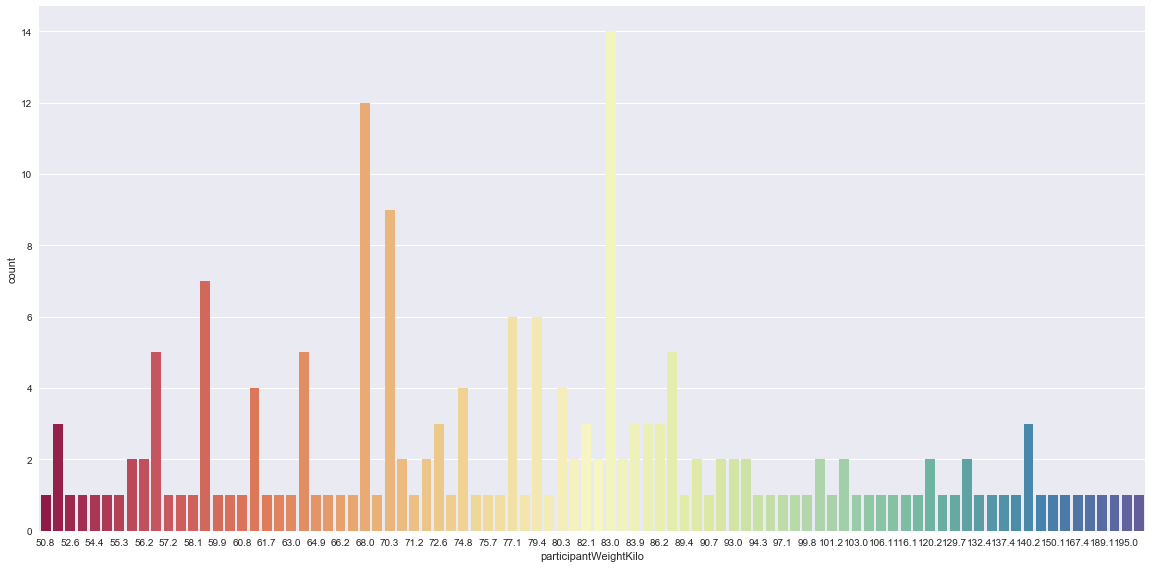

In [62]:
# convert from lbs to kilos and add as separate column
unique_individuals = unique_individuals.assign(participantWeightKilo = lambda x: np.around(0.453592*(x.participantWeightLbs),1))

# have a look at the height
g = sns.factorplot(x="participantWeightKilo", data=unique_individuals, kind="count",
                   palette="Spectral", size=8, aspect=2)
g.set_xticklabels(step=2)

# Again, 83 kilos is the default??
# --> Looks like there ar e at least more than 10 people who might not give correct height and weight

In [65]:
raw_df.get_dtype_counts()

float64    4
int64      3
bool       1
object     9
dtype: int64

In [67]:
grouped = masterdata_df.groupby("floodlightOpenId")

In [68]:
raw_df.index

RangeIndex(start=0, stop=10000, step=1)

In [70]:
testMetric = raw_df.groupby('testMetricName')['floodlightOpenId'].nunique()

In [71]:
testMetric

testMetricName
Bottom To Top Hausdorff Distance Best    152
Circle Hausdorff Distance Best           151
Correct Responses                        155
Figure 8 Hausdorff Distance Best         152
Hand Used                                152
Life Space Daily                         131
Mean Hausdorff Distance Best             153
Mood Response                            176
Number of shapes drawn correctly         150
Response Time Average                    155
Spiral Hausdorff Distance Best           152
Square Hausdorff Distance Best           152
Steps                                     47
Successful Pinches                       155
Sway Path                                138
Top to bottom Hausdorff Distance Best    152
Turn Speed Average                       113
Turns                                    113
Name: floodlightOpenId, dtype: int64

In [72]:
datapoints_per_id = raw_df.groupby('floodlightOpenId')['testResultMetricId'].count()

In [73]:
# Top datapoint producers
datapoints_per_id.sort_values(ascending=False).head()

floodlightOpenId
FL16980344    1336
FL83356285     515
FL72385624     402
FL49559827     355
FL48413206     284
Name: testResultMetricId, dtype: int64

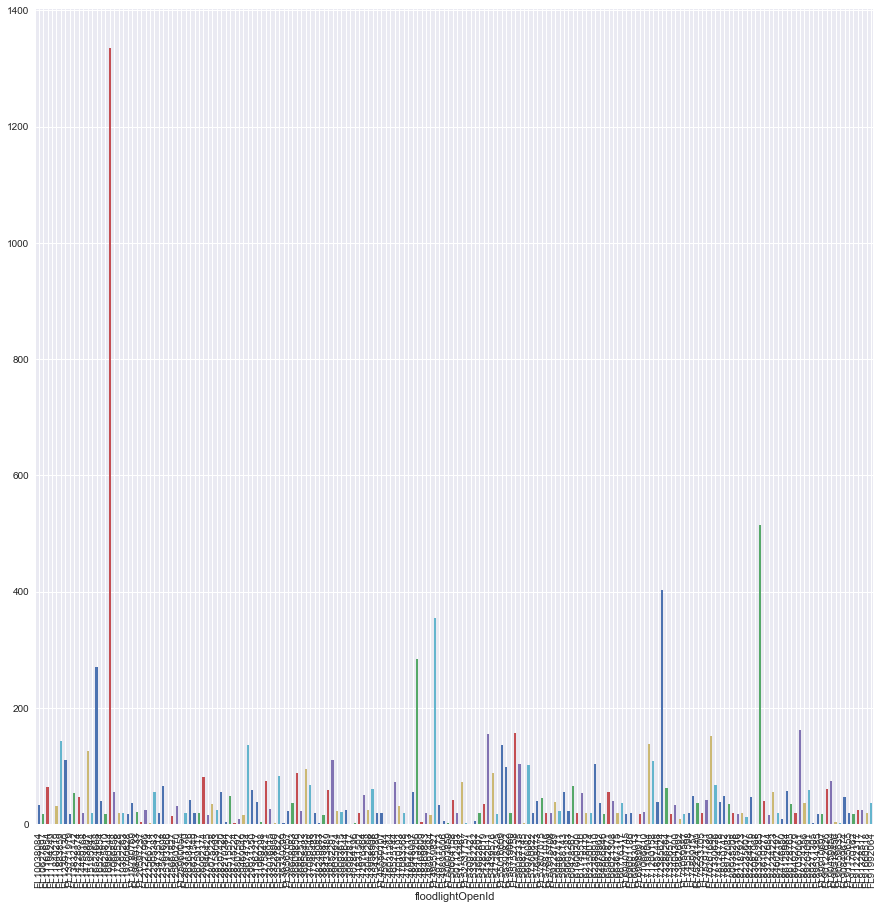

In [74]:
datapoints_per_id.plot(kind="bar", figsize= (15,15))

In [75]:
datapoints_per_id.describe()

count     188.000000
mean       53.191489
std       114.307801
min         1.000000
25%        17.000000
50%        24.000000
75%        55.250000
max      1336.000000
Name: testResultMetricId, dtype: float64

Playing with $TeX$

$l^{th}$

$$ 
A = 5^3
$$

In [154]:
import sys
sys.version

'3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]'